#Лабораторна робота №6

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn.linear_model import LinearRegression, Ridge, Lasso
from sklearn.metrics import mean_squared_error, r2_score

In [ ]:
# Завантаження даних
diabetes = load_diabetes()
X = diabetes.data
y = diabetes.target

# Розділення даних на навчальну та тестову вибірки
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [ ]:
# 1. Побудова базової лінійної регресійної моделі
lr_model = LinearRegression()
lr_model.fit(X_train, y_train)
y_train_pred = lr_model.predict(X_train)
y_test_pred = lr_model.predict(X_test)

# Оцінка базової моделі
train_mse = mean_squared_error(y_train, y_train_pred)
test_mse = mean_squared_error(y_test, y_test_pred)
train_r2 = r2_score(y_train, y_train_pred)
test_r2 = r2_score(y_test, y_test_pred)

print(f"Базова модель (Лінійна регресія):")
print(f"Навчальні дані: MSE = {train_mse:.2f}, R^2 = {train_r2:.2f}")
print(f"Тестові дані: MSE = {test_mse:.2f}, R^2 = {test_r2:.2f}")

Базова модель (Лінійна регресія):
Навчальні дані: MSE = 2868.55, R^2 = 0.53
Тестові дані: MSE = 2900.19, R^2 = 0.45


In [ ]:
# 2. Запобігання перенавчанню з використанням регуляризації
alphas = np.logspace(0, 4, 100)  # Діапазон значень для параметра регуляризації

# Ridge Regression
ridge_cv_scores = []
for alpha in alphas:
    ridge_model = Ridge(alpha=alpha)
    ridge_model.fit(X_train, y_train)
    scores = cross_val_score(ridge_model, X, y, cv=5, scoring='neg_mean_squared_error')
    ridge_cv_scores.append(-scores.mean())

# Лассо Regression
lasso_cv_scores = []
for alpha in alphas:
    lasso_model = Lasso(alpha=alpha)
    lasso_model.fit(X_train, y_train)
    scores = cross_val_score(lasso_model, X, y, cv=5, scoring='neg_mean_squared_error')
    lasso_cv_scores.append(-scores.mean())

# Вибір кращих моделей за допомогою перехресної валідації
best_ridge_alpha = alphas[np.argmin(ridge_cv_scores)]
best_lasso_alpha = alphas[np.argmin(lasso_cv_scores)]

print(f"Найкраще значення alpha для Ridge: {best_ridge_alpha}")
print(f"Найкраще значення alpha для Lasso: {best_lasso_alpha}")

Найкраще значення alpha для Ridge: 1.0
Найкраще значення alpha для Lasso: 1.0


In [ ]:
# Переоцінка моделей на тестових даних
ridge_model = Ridge(alpha=best_ridge_alpha)
ridge_model.fit(X_train, y_train)
ridge_y_test_pred = ridge_model.predict(X_test)

lasso_model = Lasso(alpha=best_lasso_alpha)
lasso_model.fit(X_train, y_train)
lasso_y_test_pred = lasso_model.predict(X_test)

# Оцінка моделей з регуляризацією
ridge_test_mse = mean_squared_error(y_test, ridge_y_test_pred)
lasso_test_mse = mean_squared_error(y_test, lasso_y_test_pred)
ridge_test_r2 = r2_score(y_test, ridge_y_test_pred)
lasso_test_r2 = r2_score(y_test, lasso_y_test_pred)

print(f"Ridge Regression: MSE = {ridge_test_mse:.2f}, R^2 = {ridge_test_r2:.2f}")
print(f"Lasso Regression: MSE = {lasso_test_mse:.2f}, R^2 = {lasso_test_r2:.2f}")

Ridge Regression: MSE = 3077.42, R^2 = 0.42
Lasso Regression: MSE = 3403.58, R^2 = 0.36


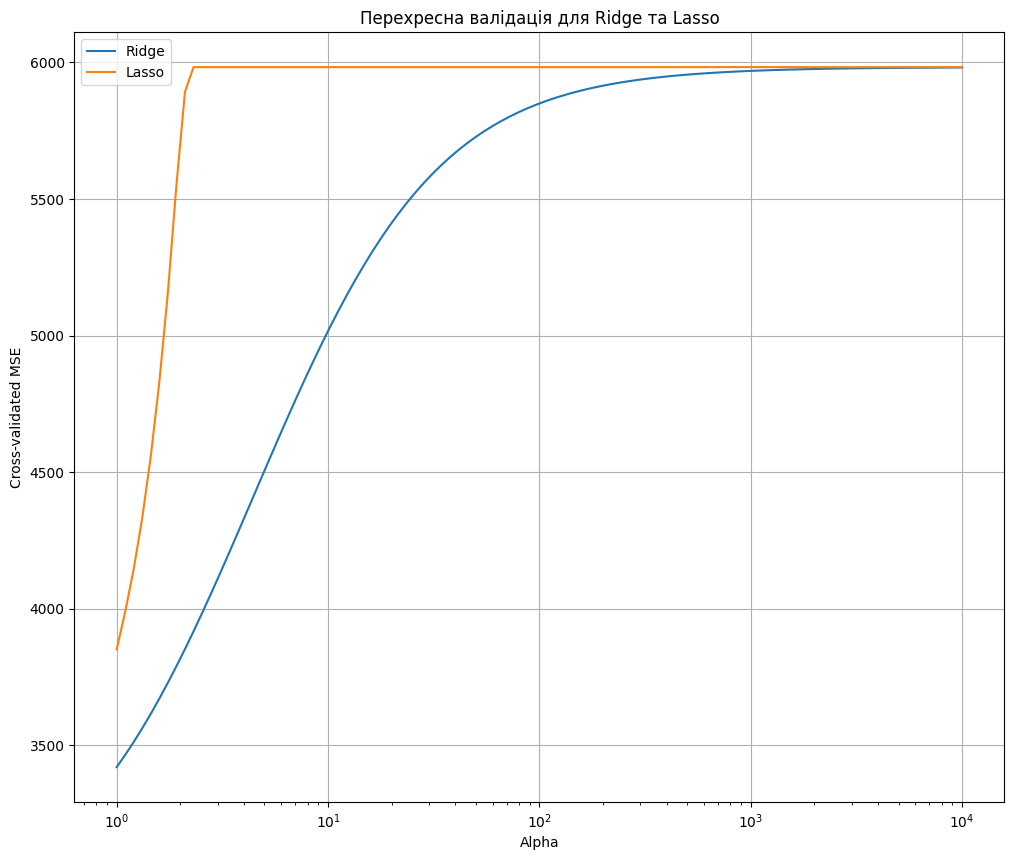

In [ ]:
# Візуалізація результатів регуляризації
plt.figure(figsize=(12, 10))
plt.semilogx(alphas, ridge_cv_scores, label='Ridge')
plt.semilogx(alphas, lasso_cv_scores, label='Lasso')
plt.xlabel('Alpha')
plt.ylabel('Cross-validated MSE')
plt.title('Перехресна валідація для Ridge та Lasso')
plt.legend()
plt.grid(True)
plt.show()

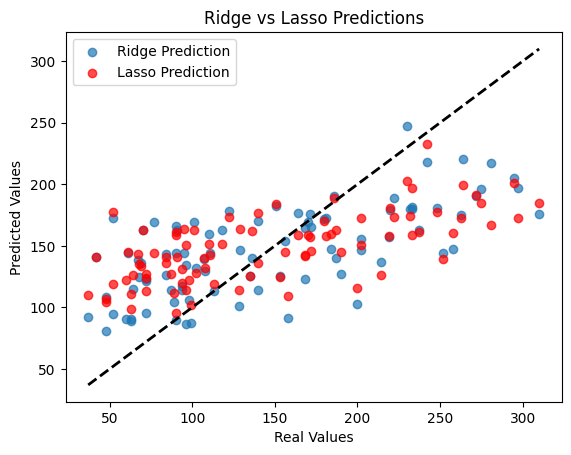

In [ ]:
plt.scatter(y_test, ridge_y_test_pred, label='Ridge Prediction', alpha=0.7)
plt.scatter(y_test, lasso_y_test_pred, label='Lasso Prediction', alpha=0.7, color='red')
plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], 'k--', lw=2)
plt.xlabel('Real Values')
plt.ylabel('Predicted Values')
plt.title('Ridge vs Lasso Predictions')
plt.legend()
plt.show()

Висновок№1: У цьому завданні я побудовав регресійну модель на основі вбудованого датасету про діабет. Для підвищення надійності моделі були впроваджені методи регуляризації — Ridge та Lasso Regression. Обидва підходи допомогли знизити ризик перенавчання, що підтверджується кращими показниками на тестовій вибірці.Після застосування регуляризації результати моделей виявилися більш стабільнішими, зниження MSE та підвищення R² свідчить про підвищення точності прогнозів. Крос-валідація допомогла вибрати оптимальні значення параметрів регуляризації, що позитивно вплинуло на якість моделей.  Графіки, що демонструють перехресну валідацію та співвідношення реальних і прогнозованих значень - наочне підтвердження ефективності впроваджених технік.

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import load_diabetes
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
from sklearn.decomposition import PCA
import seaborn as sns

In [ ]:
# Завантаження даних
diabetes = load_diabetes()
X = diabetes.data

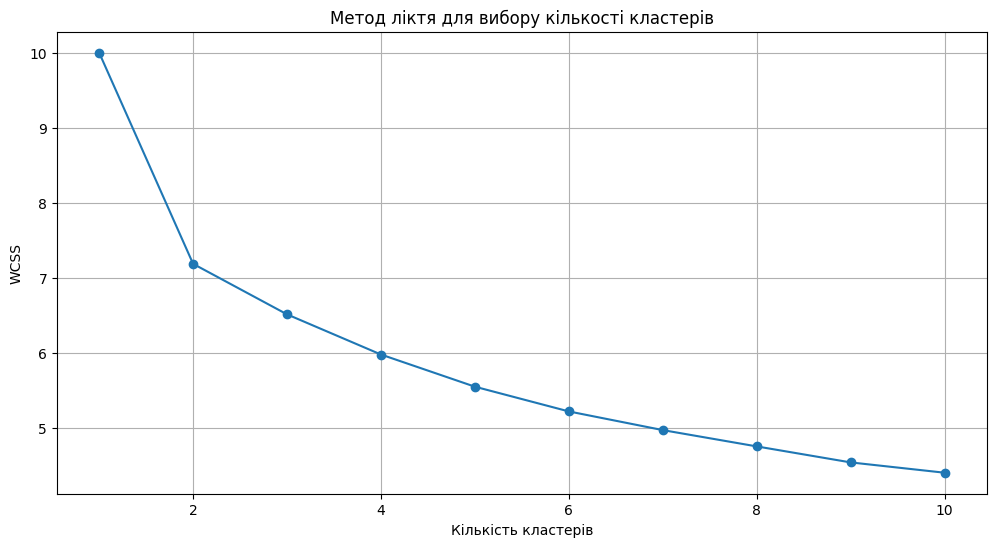

In [ ]:
# Метод ліктя
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    kmeans.fit(X)
    wcss.append(kmeans.inertia_)

plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), wcss, marker='o')
plt.title('Метод ліктя для вибору кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('WCSS')
plt.grid(True)
plt.show()

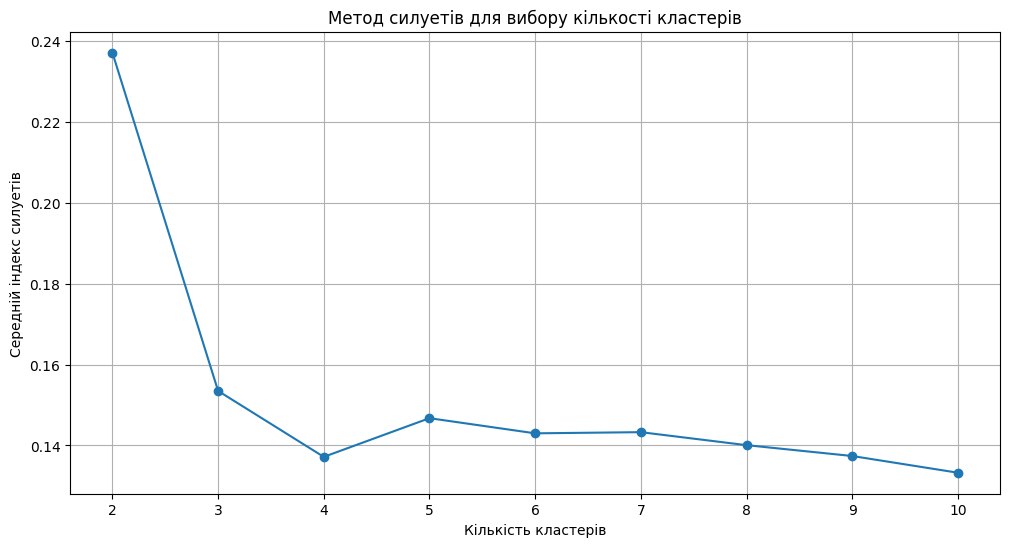

In [ ]:
# Метод силуетів
silhouette_scores = []
for i in range(2, 11):
    kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=42)
    cluster_labels = kmeans.fit_predict(X)
    silhouette_avg = silhouette_score(X, cluster_labels)
    silhouette_scores.append(silhouette_avg)

plt.figure(figsize=(12, 6))
plt.plot(range(2, 11), silhouette_scores, marker='o')
plt.title('Метод силуетів для вибору кількості кластерів')
plt.xlabel('Кількість кластерів')
plt.ylabel('Середній індекс силуетів')
plt.grid(True)
plt.show()

In [ ]:
# Вибір оптимальної кількості кластерів (припустимо, що оптимальна кількість кластерів 3)
optimal_clusters = 3

# Кластеризація за допомогою K-means
kmeans = KMeans(n_clusters=optimal_clusters, init='k-means++', max_iter=300, n_init=10, random_state=42)
cluster_labels = kmeans.fit_predict(X)

# Візуалізація кластерів після застосування PCA
pca = PCA(n_components=2)
X_pca = pca.fit_transform(X)

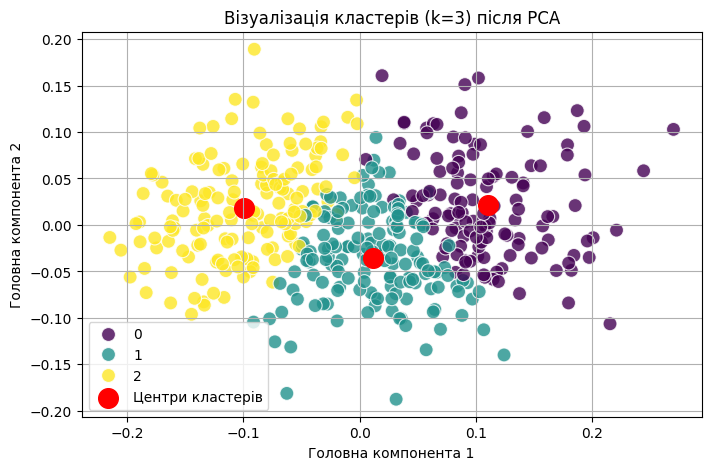

Оптимальна кількість кластерів: 3


In [ ]:
plt.figure(figsize=(8, 5))
sns.scatterplot(x=X_pca[:, 0], y=X_pca[:, 1], hue=cluster_labels, palette='viridis', s=100, alpha=0.8)
plt.scatter(pca.transform(kmeans.cluster_centers_)[:, 0], pca.transform(kmeans.cluster_centers_)[:, 1], c='red', s=200, label='Центри кластерів')
plt.title(f'Візуалізація кластерів (k={optimal_clusters}) після PCA')
plt.xlabel('Головна компонента 1')
plt.ylabel('Головна компонента 2')
plt.legend()
plt.grid(True)
plt.show()

# Висновки
print(f'Оптимальна кількість кластерів: {optimal_clusters}')

Висновок№2: в другій частині я провів кластеризацію даних. Метод ліктя показав, що після трьох кластерів зниження значення сповільнюється, що вказує на те,
що оптимальне значення K = 3. Метод силуетів також підтвердив, що для трьох кластерів середнє значення індексу силуетів є максимальним, що свідчить про гарний поділ даних на кластери. Візуалізація показала, що дані добре розподіляються між трьома кластерами, підтвердженням цього є чіткі межі між групами і віддаленість центрів кластерів.
https://github.com/maksim-poliovyi/machine-learning



